In [1]:
from PIL import Image
import cv2
import os.path
import fnmatch
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
path = "C:\check_image\\"
tr_path = path+"train\\"
file_list = os.listdir(tr_path)
file_list_png = [file for file in file_list if file.endswith(".png")]

In [3]:
for file_list in os.listdir(tr_path):
        if file_list[3:4] == '1' :
            phone = Image.open(tr_path+file_list)
            phone.save(tr_path+"1\\"+file_list)
        elif file_list[3:4] == '2' :        
            pen = Image.open(tr_path+file_list)
            pen.save(tr_path+"2\\"+file_list)
        elif file_list[3:4] == '3' :        
            mouse = Image.open(tr_path+file_list)
            mouse.save(tr_path+"3\\"+file_list)
        elif file_list[3:4] == '4' :        
            glasses = Image.open(tr_path+file_list)
            glasses.save(tr_path+"4\\"+file_list)
        elif file_list[3:4] == '5' :        
            bag = Image.open(tr_path+file_list)
            bag.save(tr_path+"5\\"+file_list)
        elif file_list[3:4] == '6' :        
            marker = Image.open(tr_path+file_list)
            marker.save(tr_path+"6\\"+file_list)

In [4]:
val_path = path+"validation\\"
file_list = os.listdir(val_path)
file_list_png = [file for file in file_list if file.endswith(".png")]

In [5]:
for file_list in os.listdir(val_path):
        if file_list[3:4] == '1' :
            phone = Image.open(val_path+file_list)
            phone.save(val_path+"1\\"+file_list)
        elif file_list[3:4] == '2' :        
            pen = Image.open(val_path+file_list)
            pen.save(val_path+"2\\"+file_list)
        elif file_list[3:4] == '3' :        
            mouse = Image.open(val_path+file_list)
            mouse.save(val_path+"3\\"+file_list)
        elif file_list[3:4] == '4' :        
            glasses = Image.open(val_path+file_list)
            glasses.save(val_path+"4\\"+file_list)
        elif file_list[3:4] == '5' :        
            bag = Image.open(val_path+file_list)
            bag.save(val_path+"5\\"+file_list)
        elif file_list[3:4] == '6' :        
            marker = Image.open(val_path+file_list)
            marker.save(val_path+"6\\"+file_list)

In [6]:
TRAINING_DIR = tr_path
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
VALIDATION_DIR = val_path
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(150,150),
class_mode='categorical',
batch_size=15
)

Found 300 images belonging to 6 classes.


In [14]:
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150,150),
class_mode='categorical',
batch_size=15
)

Found 120 images belonging to 6 classes.


In [15]:
model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 150x150 with 3 bytes color
  # This is the first convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # The second convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The third convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The fourth convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(6, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [18]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=6)

Epoch 1/50
20/20 [==============================] - 15s 711ms/step - loss: 2.0874 - accuracy: 0.1933 - val_loss: 1.7916 - val_accuracy: 0.1778
Epoch 2/50
20/20 [==============================] - 14s 690ms/step - loss: 1.7982 - accuracy: 0.2200 - val_loss: 1.8059 - val_accuracy: 0.1333
Epoch 3/50
20/20 [==============================] - 15s 741ms/step - loss: 1.7847 - accuracy: 0.1867 - val_loss: 1.7391 - val_accuracy: 0.1556
Epoch 4/50
20/20 [==============================] - 14s 696ms/step - loss: 1.7956 - accuracy: 0.2833 - val_loss: 1.6802 - val_accuracy: 0.2222
Epoch 5/50
20/20 [==============================] - 14s 686ms/step - loss: 1.7274 - accuracy: 0.2833 - val_loss: 1.6649 - val_accuracy: 0.2333
Epoch 6/50
20/20 [==============================] - 15s 727ms/step - loss: 1.5650 - accuracy: 0.3467 - val_loss: 1.3981 - val_accuracy: 0.3889
Epoch 7/50
20/20 [==============================] - 14s 678ms/step - loss: 1.5897 - accuracy: 0.3733 - val_loss: 1.4403 - val_accuracy: 0.3667

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

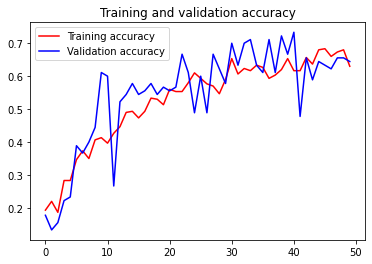

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test accuracy: {}".format(test_accuracy))

8/8 [==============================] - 2s 194ms/step - loss: 0.9825 - accuracy: 0.6833
Test accuracy: 0.6833333373069763


In [23]:
predictions = model.predict(validation_generator)

In [36]:
predictions[0]

array([8.1144983e-27, 7.6906492e-14, 2.4463524e-26, 1.3274183e-18,
       1.5838765e-26, 1.0000000e+00], dtype=float32)

In [41]:
predictions1 = model.predict(train_generator)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
np.argmax(predictions[23])

1

In [56]:
np.argmax(predictions1[23])

5